## 1. Importing Libraries

In [34]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from jcopml.pipeline import num_pipe, cat_pipe

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Import Dataset

In [35]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

## 3. Exploratory Data Analysis

In [36]:
df = df.drop(columns=[
    'SEQN', 'Ratio_Family_Income_Poverty', 'Health_Insurance', 'Annual_Family_Income', 'Height', 'X60_sec_pulse', 
    'Lymphocyte', 'Monocyte', 'Eosinophils', 'Total_Cholesterol', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Hematocrit',
    'Segmented_Neutrophils'])

In [37]:
# Nama kolom yang ingin Anda cari indeksnya
columns_to_find =['Gender', 'Vigorous_work', 'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

# Mendapatkan indeks kolom
column_indices = [df.columns.get_loc(column) for column in columns_to_find]

print(column_indices)

[0, 32, 33, 34, 35, 36]


## 4. Pre-Processing

In [38]:
# Mengatur pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)
df.describe()

Gender           Age      Systolic     Diastolic        Weight  \
count  37079.000000  37079.000000  37079.000000  37079.000000  37079.000000   
mean       1.513282     48.943661    124.090078     69.919253     80.988276   
std        0.499830     18.010440     19.254741     13.575804     20.678734   
min        1.000000     20.000000      0.000000      0.000000     32.300000   
25%        1.000000     33.000000    111.000000     62.000000     66.500000   
50%        2.000000     48.000000    121.000000     70.000000     78.200000   
75%        2.000000     63.000000    134.000000     78.000000     92.100000   
max        2.000000     85.000000    270.000000    132.000000    371.000000   

       Body_Mass_Index  White_Blood_Cells     Basophils  Red_Blood_Cells  \
count     37079.000000       37079.000000  37079.000000     37079.000000   
mean         28.824588           7.269524      0.700906         4.668632   
std           6.608982           2.478754      0.474369         0.509368   
min          13.180000           1.400000      0.000000         2.260000   
25%          24.220000           5.700000      0.400000         4.320000   
50%          27.800000           6.900000      0.600000         4.660000   
75%          32.100000           8.400000      0.900000         5.010000   
max         130.210000         117.200000     13.900000         8.300000   

         Hemoglobin  Mean_cell_Hemoglobin  Platelet_count  Mean_Platelet_Vol  \
count  37079.000000          37079.000000    37079.000000       37079.000000   
mean      14.139073             33.897452      253.012886           8.196637   
std        1.541599              0.932481       67.403298           0.923022   
min        5.800000             27.800000        4.000000           4.700000   
25%       13.100000             33.300000      208.000000           7.600000   
50%       14.100000             33.861696      246.000000           8.100000   
75%       15.200000             34.500000      290.000000           8.800000   
max       19.700000             44.900000     1000.000000          15.100000   

       Red_Cell_Distribution_Width       Albumin           ALP           AST  \
count                 37079.000000  37079.000000  37079.000000  37079.000000   
mean                     13.082278     42.528116     70.789611     25.722511   
std                       1.304517      3.585254     26.073559     19.695625   
min                       9.700000     19.000000      7.000000      7.000000   
25%                      12.300000     40.000000     55.000000     19.000000   
50%                      12.800000     43.000000     67.000000     23.000000   
75%                      13.500000     45.000000     82.000000     27.000000   
max                      37.800000     57.000000    729.000000   1672.000000   

                ALT   Cholesterol    Creatinine       Glucose           GGT  \
count  37079.000000  37079.000000  37079.000000  37079.000000  37079.000000   
mean      25.601850      5.077399     78.632276      5.595013     29.459667   
std       25.889693      1.079629     39.157384      2.059786     43.576787   
min        4.000000      0.155000     17.700000      1.050000      3.000000   
25%       16.000000      4.319000     61.880000      4.718000     14.000000   
50%       21.000000      4.991000     73.370000      5.110000     20.000000   
75%       28.000000      5.740000     88.400000      5.662000     31.000000   
max     1997.000000     14.611000   1573.520000     34.250000   2274.000000   

               Iron           LDH    Phosphorus     Bilirubin       Protein  \
count  37079.000000  37079.000000  37079.000000  37079.000000  37079.000000   
mean      15.266181    132.045632      1.203049     11.801173     72.050158   
std        6.416872     31.961662      0.182223      5.276652      4.967992   
min        0.900000      4.000000      0.484000      0.000000     47.000000   
25%       10.900000    113.000000      1.098000      8.550000     6

### Outlier Detection and Removal:

In [39]:
# plt.figure(figsize=(100,20), facecolor='w')
# sns.boxplot(data=df)
# plt.show()

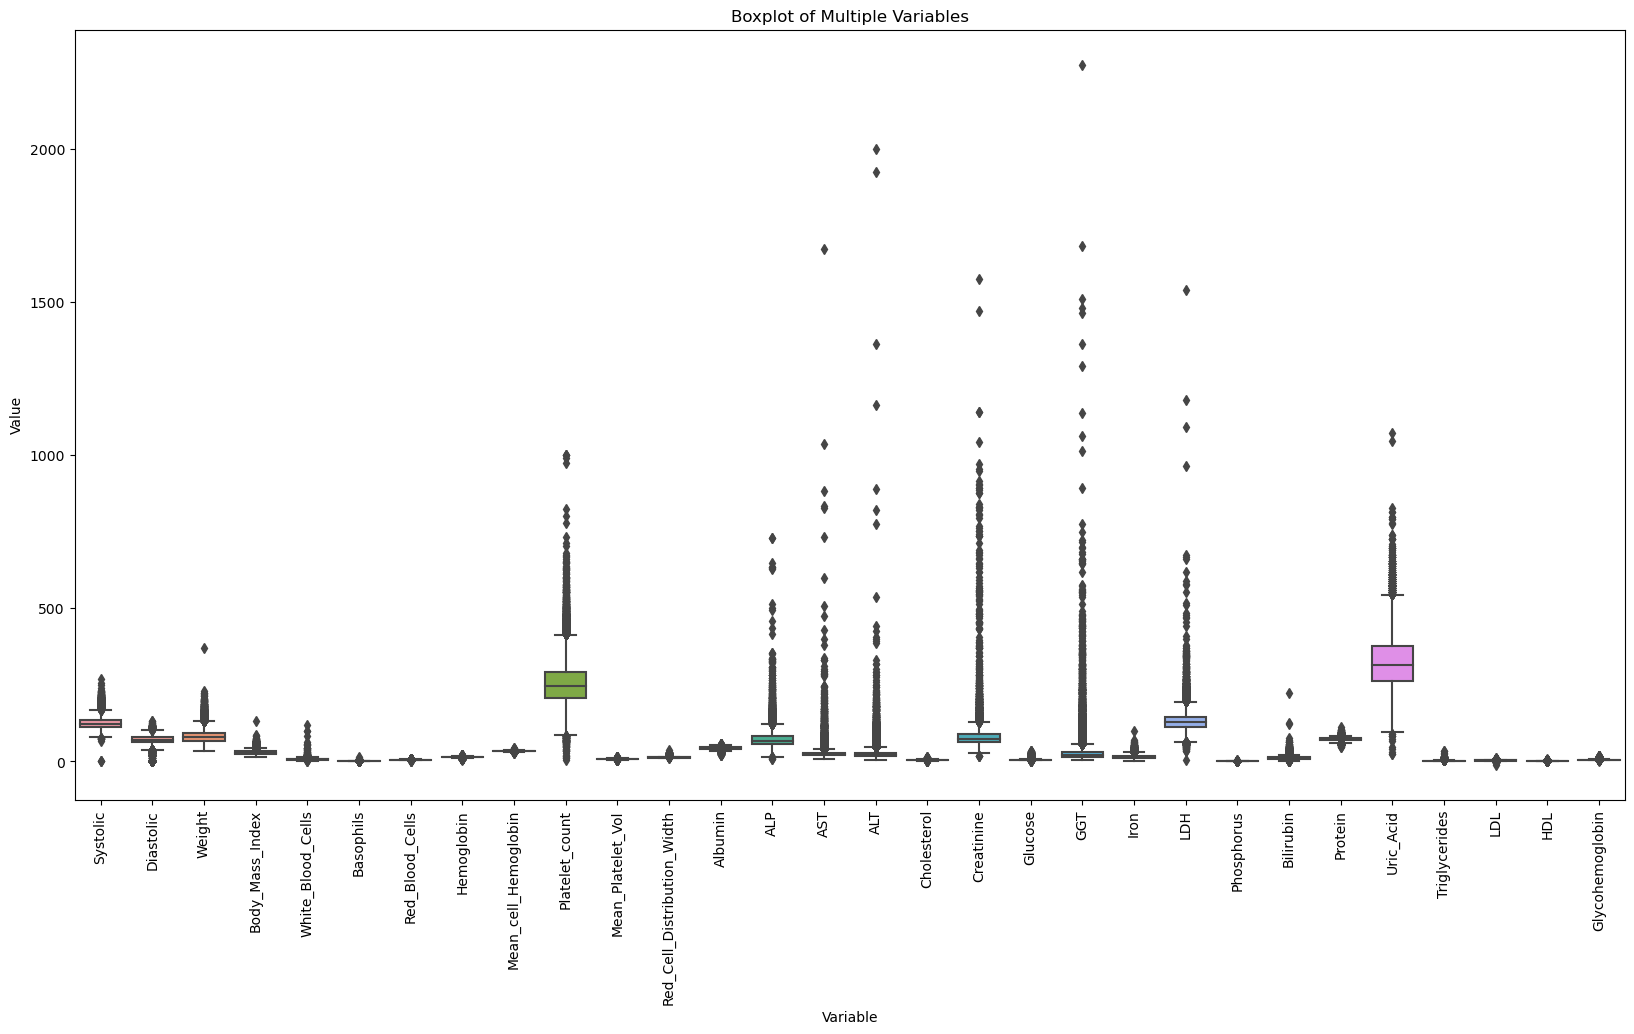

In [40]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# # Menggabungkan data untuk plot
melted_df = df[num_variables].melt(var_name='Variable', value_name='Value')

# # Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)


# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()
plt.show()

In [41]:
# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[column].mean()
        
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers with mean
df_clean = replace_outliers_with_mean(df, num_variables)

# Menampilkan data asli
print("Data Data Asli")
print(df)

# Menampilkan data setelah penghapusan outlier
print("\nData setelah replace dengan mean:")
print(df_clean)

Data Data Asli
       Gender  Age    Systolic  Diastolic  Weight  Body_Mass_Index  \
0           1   77   98.000000       56.0    75.4            24.90   
1           1   49  122.000000       83.0    92.5            29.10   
2           1   37  124.090078       99.0    99.2            30.62   
3           1   70  130.000000       66.0    63.6            25.57   
4           1   81  136.000000       61.0    75.5            27.33   
...       ...  ...         ...        ...     ...              ...   
37074       1   25  112.000000       76.0    39.2            21.00   
37075       2   76  112.000000       46.0    59.1            21.50   
37076       2   80  146.000000       58.0    71.7            31.00   
37077       1   35  106.000000       66.0    78.2            26.00   
37078       2   24  114.000000       68.0    58.3            21.40   

       White_Blood_Cells  Basophils  Red_Blood_Cells  Hemoglobin  \
0                    7.6        0.5             4.73        14.1   
1       

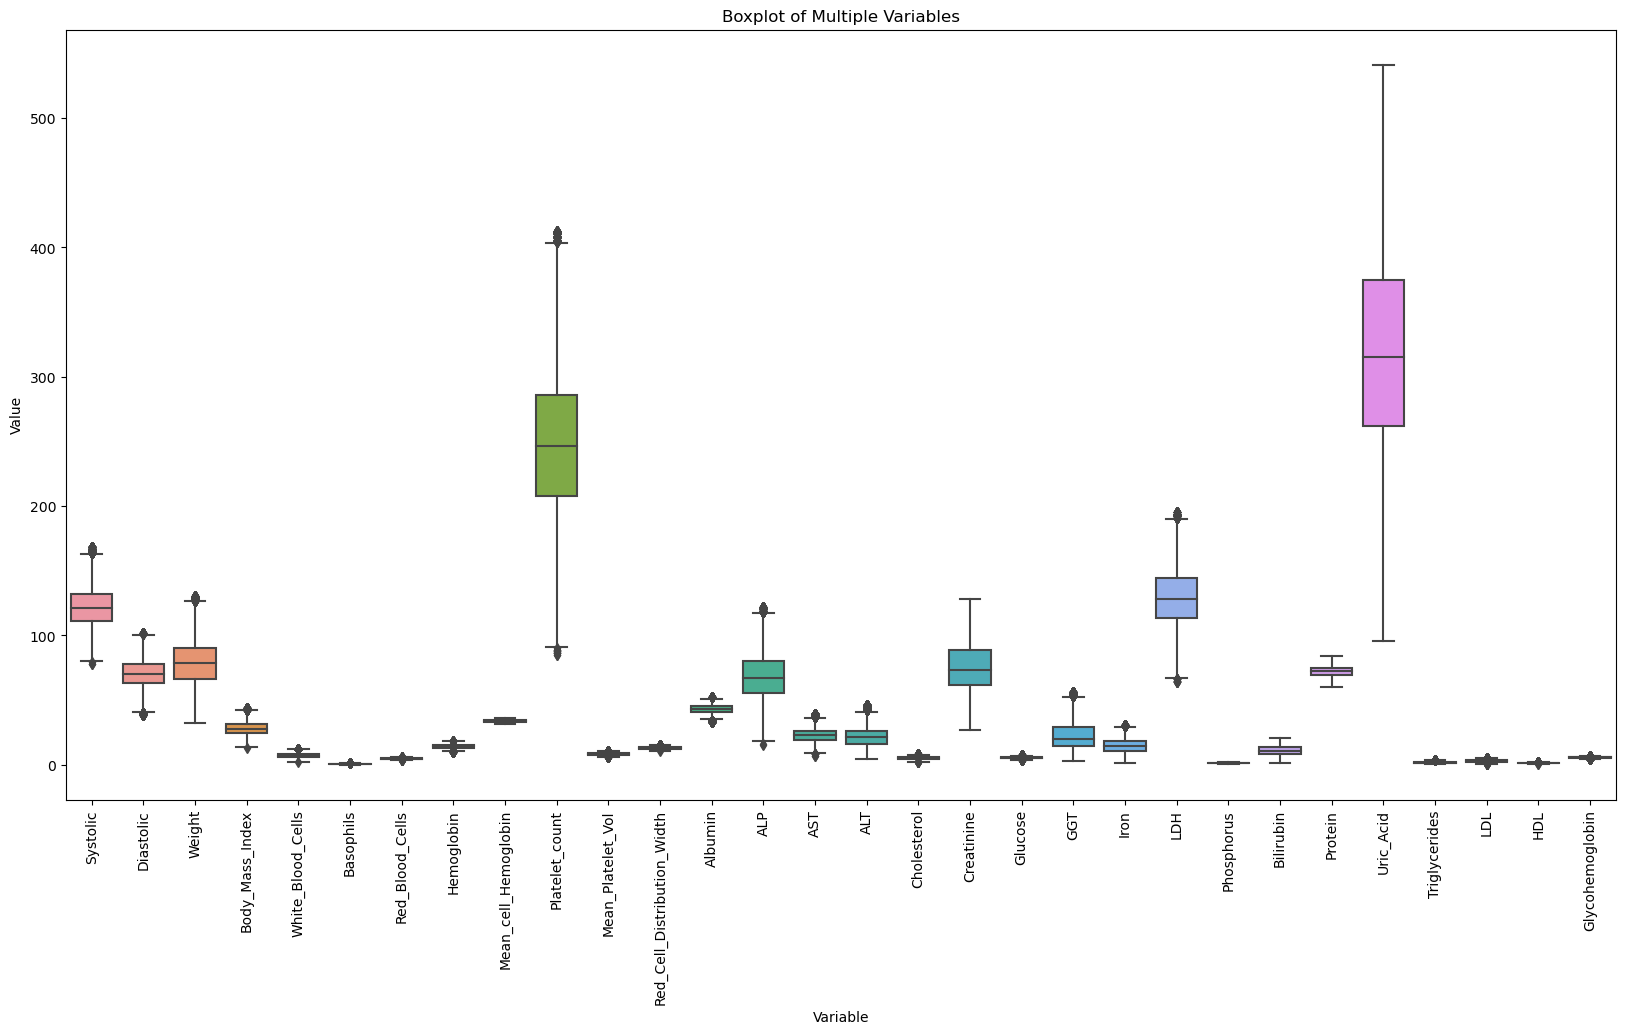

In [42]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df_clean, columns):
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
#         mean_value = df[column].mean()
#         df.loc[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound), column] = mean_value
        
        median_value = df[column].median()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Menggabungkan data untuk plot
melted_df = df_clean[num_variables].melt(var_name='Variable', value_name='Value')

# # Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)

# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df_clean[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()

plt.show()



## Menghitung korelasi

Features identified for removal: {'Hemoglobin', 'LDL', 'Body_Mass_Index'}
Remaining features after correlation thresholding: Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'White_Blood_Cells',
       'Basophils', 'Red_Blood_Cells', 'Mean_cell_Hemoglobin',
       'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid',
       'Triglycerides', 'HDL', 'Glycohemoglobin', 'Vigorous_work',
       'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'],
      dtype='object')


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

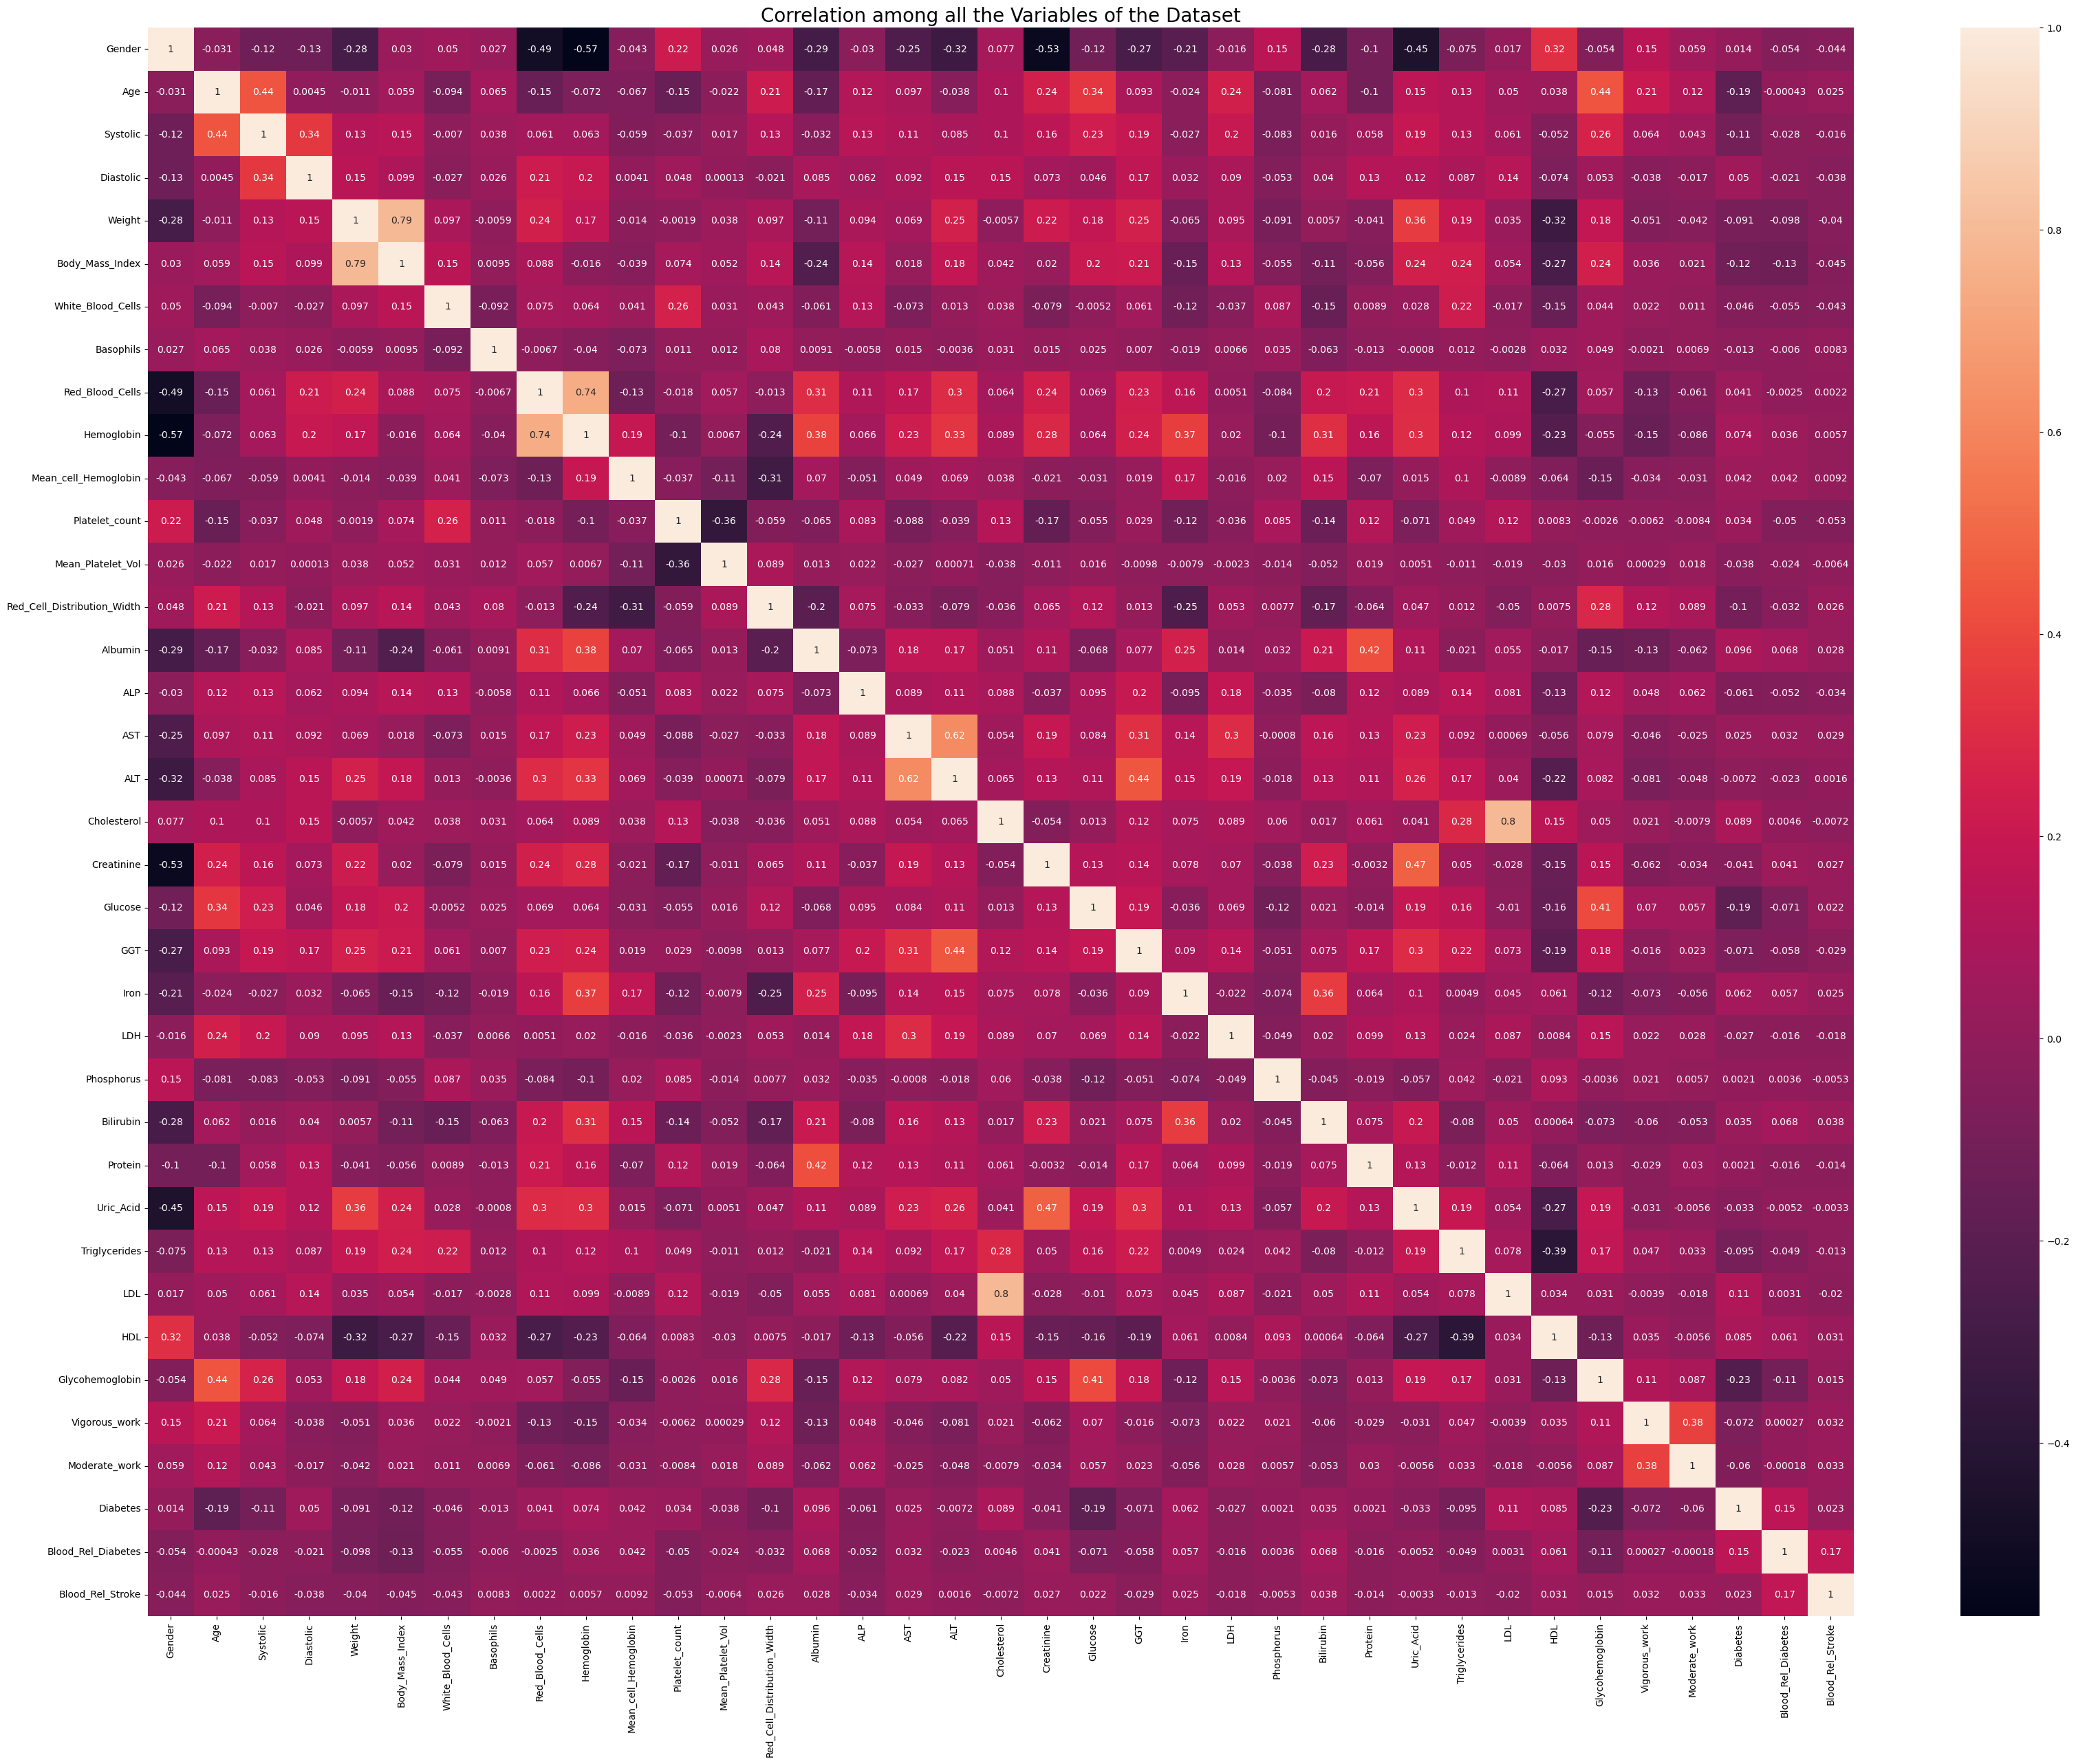

In [43]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target column for the correlation matrix
df_features = df.drop(columns='CoronaryHeartDisease')

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set the correlation threshold
threshold = 0.7

# Identify features to drop based on the threshold
col_corr = set()  # Set of all the names of correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Absolute value of the correlation coefficient
            colname = correlation_matrix.columns[i]  # Getting the name of the column
            col_corr.add(colname)

# Print the identified features for review
print(f"Features identified for removal: {col_corr}")

# Remove the highly correlated features
df_reduced = df_features.drop(columns=col_corr)

print(f"Remaining features after correlation thresholding: {df_reduced.columns}")

# Optionally, add the target variable back to the reduced dataframe
df_reduced['CoronaryHeartDisease'] = df['CoronaryHeartDisease']

#Checking relationship between variables
cor=df_features.corr()
plt.figure(figsize=(40,30), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

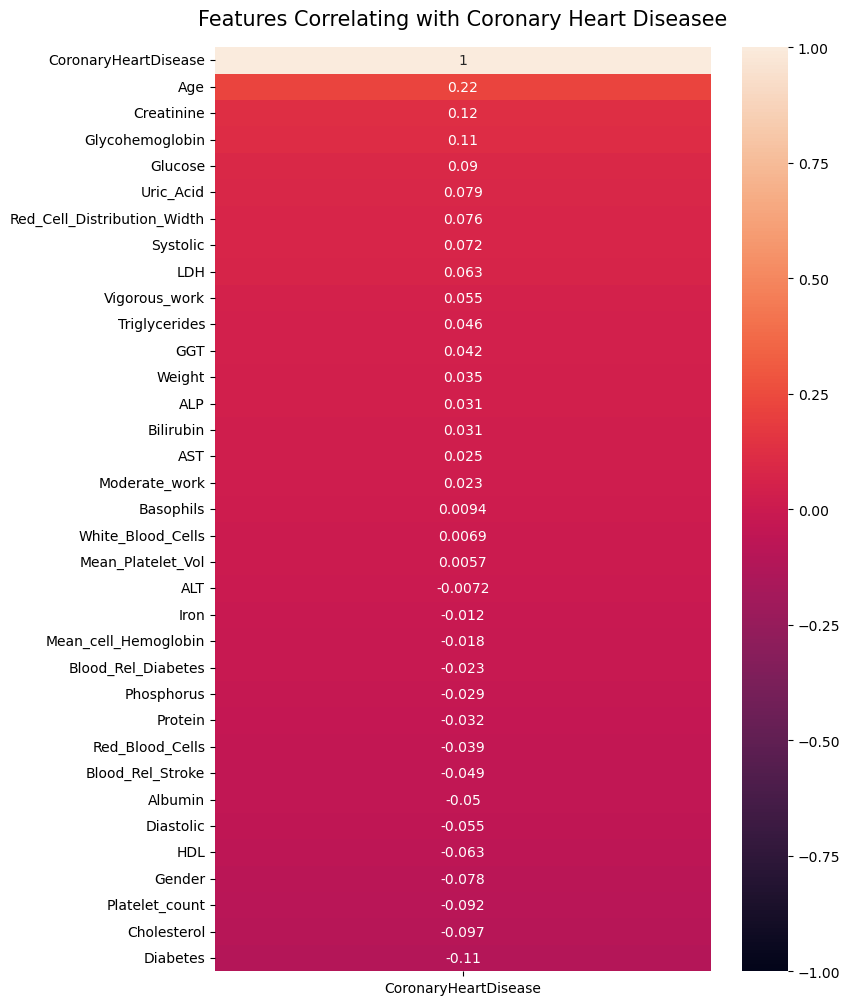

In [44]:
#  korelasi semua fitur dengan 'CoronaryHeartDisease', sebuah variabel dependen tunggal, yang diurutkan berdasarkan 'CoronaryHeartDisease' secara menurun.
df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Coronary Heart Diseasee', fontdict={'fontsize':15}, pad=16);

## Feature Splitting

In [45]:
X = df_reduced.drop(columns='CoronaryHeartDisease') #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df_reduced['CoronaryHeartDisease'] #y atribut label (dependent)

## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [46]:
#SMOTE
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC

# Resampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan hasil resampling
print("Sebelum resampling, distribusi kelas pada training set:")
print(pd.Series(y).value_counts())
print("\nSetelah resampling, distribusi kelas pada training set:")
print(pd.Series(y_resampled).value_counts())
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')

print('\nBalance of positive and negative classes (%):')
y_resampled.value_counts(normalize=True) * 100

Sebelum resampling, distribusi kelas pada training set:
0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

Setelah resampling, distribusi kelas pada training set:
0    35571
1    35571
Name: CoronaryHeartDisease, dtype: int64
Shape of X before SMOTE: (37079, 34)
Shape of X after SMOTE: (71142, 34)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: CoronaryHeartDisease, dtype: float64

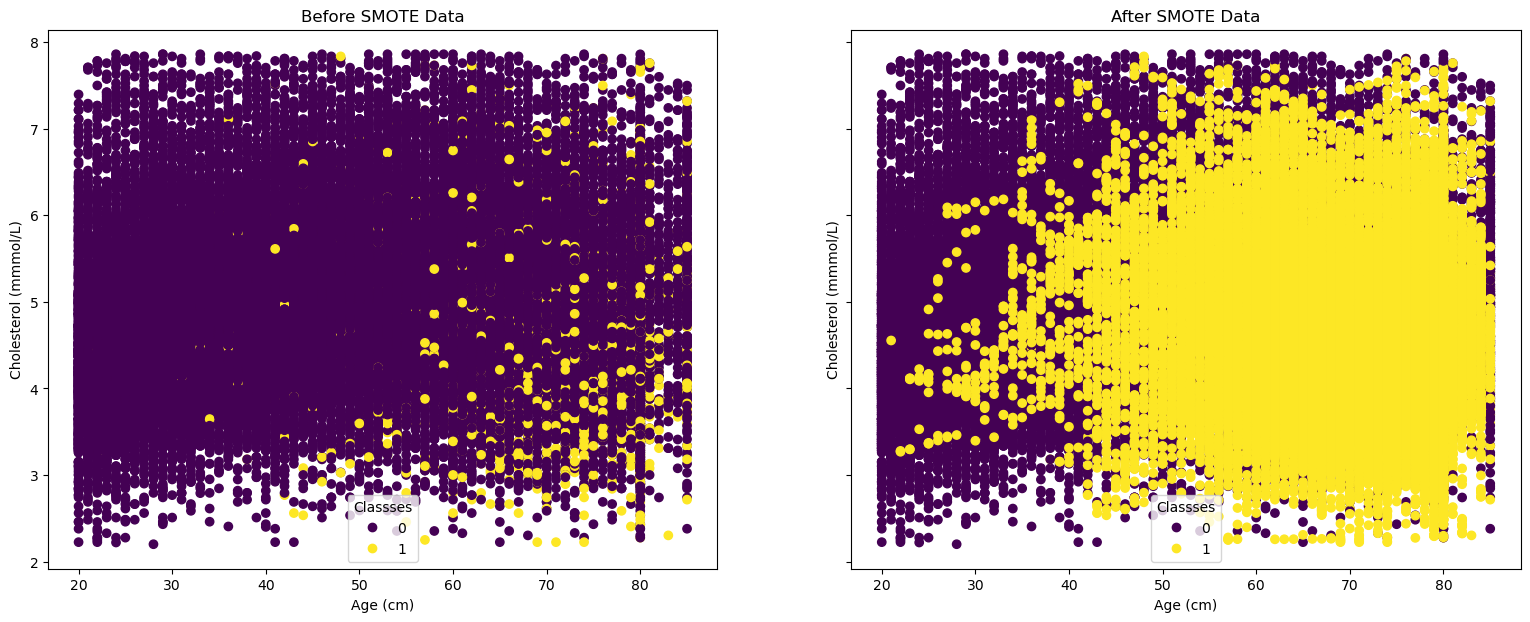

In [47]:
import matplotlib.pyplot as plt
fig,((ax0, ax1))=plt.subplots(nrows=1,ncols=2,figsize=(19,7),sharey=True );

scatter0 = ax0.scatter(x=X['Age'],
                       y=X['Cholesterol'],
                       c=y)

ax0.set(title= 'Before SMOTE Data',xlabel = 'Age (cm)' ,
       ylabel ='Cholesterol (mmmol/L)' )

ax0.legend(*scatter0.legend_elements(),title='Classses');

#----------------------------------------------------------------

scatter1 = ax1.scatter(x=X_resampled['Age'],
                       y=X_resampled['Cholesterol'],
                       c=y_resampled)

ax1.set(title= 'After SMOTE Data',xlabel = 'Age (cm)' ,
       ylabel ='Cholesterol (mmmol/L)' )

ax1.legend(*scatter1.legend_elements(),title='Classses');

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.2, 
                                                    stratify = y_resampled, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56913, 34), (14229, 34), (56913,), (14229,))

In [49]:
y_train.value_counts()

1    28457
0    28456
Name: CoronaryHeartDisease, dtype: int64

## Training to get the hyperparameter

In [50]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

from jcopml.tuning.space import Integer, Real
from skopt.space import Categorical

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

### SelectKBest

In [51]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Misalnya kita punya dataset X_resampled (fitur), y_resampled (target) dan X_test
# X_resampled, y_resampled = load_your_data()
# X_test = load_your_test_data()

# Feature selection menggunakan SelectKBest
k = 30  # Memilih 10 fitur terbaik
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Mendapatkan skor dari semua fitur
scores = selector.scores_

# Mendapatkan indeks dari fitur yang terpilih
selected_features_indices = selector.get_support(indices=True)

# Mendapatkan skor dari fitur yang terpilih
selected_scores = scores[selected_features_indices]

# Membuat DataFrame untuk memudahkan interpretasi
feature_scores = pd.DataFrame({
    'Feature': X_resampled.columns[selected_features_indices],
    'Score': selected_scores
})

# Menampilkan skor fitur yang terpilih
print(feature_scores.sort_values(by='Score', ascending=False))

                        Feature     Score
7               Red_Blood_Cells  0.570648
5             White_Blood_Cells  0.568717
16                  Cholesterol  0.562200
13                          ALP  0.561535
27                          HDL  0.560302
26                Triglycerides  0.560123
20                         Iron  0.559420
21                          LDH  0.557376
10            Mean_Platelet_Vol  0.548146
11  Red_Cell_Distribution_Width  0.544856
2                      Systolic  0.541780
9                Platelet_count  0.540529
19                          GGT  0.539958
22                   Phosphorus  0.539798
15                          ALT  0.539666
18                      Glucose  0.538598
17                   Creatinine  0.538086
3                     Diastolic  0.529329
24                      Protein  0.523944
14                          AST  0.520614
28              Glycohemoglobin  0.515226
4                        Weight  0.511130
6                     Basophils  0

pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
pip install jupyter_nbextensions_configurator
jupyter nbextensions_configurator enable --user

In [ ]:
import optuna
from optuna.samplers import MOTPESampler
from optuna.visualization import plot_pareto_front
from optuna.pruners import SuccessiveHalvingPruner
import time
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK
from joblib import parallel_backend


# Definisikan fungsi tujuan
def objective(trial):
    params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'max_depth': trial.suggest_int('max_depth', 1, 10),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 25),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1.0, log = True),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0)
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step = 1),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log = True),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9, step = 0.1),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
        
    }
    
    # Buat model classifier
    clf = GradientBoostingClassifier(random_state=42, **params)

#   clf = xgb.XGBClassifier(random_state=42, **params, use_label_encoder=False)
    
    # Lakukan cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
      
    start_time = time.time()
    score = cross_val_score(clf, X_train_selected, y_train, cv=cv, scoring="accuracy", n_jobs=-1).mean()
    end_time = time.time()
    computation_time = end_time - start_time
    
    # Fungsi trial.report dan trial.should_prune dihapus karena tidak mendukung optimasi multi-objektif

    
    return score, computation_time


# Create study Optuna dengan MOTPESampler
study = optuna.create_study(directions=["maximize", "minimize"], sampler=MOTPESampler(
                                                                                    n_startup_trials=54, 
                                                                                    n_ehvi_candidates=24, 
                                                                                    gamma=0.1, 
                                                                                    seed=42))

# Custom callback function to print intermediate results
total_computation_time = 0  # Variabel untuk menyimpan total waktu komputasi

# Custom callback function to print intermediate results
def print_intermediate_results(study, trial):
    global total_computation_time
    total_computation_time += trial.values[1]  # Menambahkan waktu komputasi untuk setiap trial
    print(f"Trial {trial.number}:")
    print(f"  Values: {trial.values}")
    print(f"  Params: {trial.params}")
    print(f"  Computation Time: {trial.values[1]:.2f} seconds")

# Optimize with callback
# study.optimize(objective, n_trials=100, callbacks=[print_intermediate_results])

# Optimize with callback
with parallel_backend("loky", n_jobs=-1):
    study.optimize(objective, n_trials=100, callbacks=[print_intermediate_results])

# Menampilkan hasil terbaik dari Pareto front
print(f"Best trials:")
for trial in study.best_trials:
    print(f"Trial {trial.number}:")
    print(f"  Values: {trial.values}")
    print(f"  Params: {trial.params}")


# Visualisasi Pareto front
plot_pareto_front(study).show()

# Analyzing the Results
import optuna.visualization as vis
# Menentukan target untuk visualisasi
def target_score(trial):
    return trial.values[0]

def target_computation_time(trial):
    return trial.values[1]

# Plots the optimization history, showing the objective function value for each trial.
vis.plot_optimization_history(study, target=target_score, target_name="Objective Value").show()
vis.plot_optimization_history(study, target=target_computation_time, target_name="Computation Time").show()

# Plots the parameter importances, indicating the relative importance of each hyperparameter in the optimization process.
vis.plot_param_importances(study, target=target_score, target_name="Objective Value").show()
vis.plot_param_importances(study, target=target_computation_time, target_name="Computation Time").show()

# Generates a slice plot, visualizing the individual conditional distributions of the hyperparameters.
vis.plot_slice(study, target=target_score, target_name="Objective Value").show()
vis.plot_slice(study, target=target_computation_time, target_name="Computation Time").show()

# The function below plots the parameter relationship as contour plot in a study.
# It should be borne in mind that if a parameter contains missing values, a trial with missing values is not plotted.
vis.plot_contour(study, target=target_score, target_name="Objective Value").show()
vis.plot_contour(study, target=target_computation_time, target_name="Computation Time").show()


# Menggunakan trial terbaik untuk membuat model
best_trial = study.best_trials[0]  # Mengambil salah satu trial terbaik
best_params = best_trial.params
model = GradientBoostingClassifier(random_state=42, 
#                                    n_estimators=int(best_params['n_estimators']),
#                                    max_depth=int(best_params['max_depth']),
#                                    max_leaf_nodes=int(best_params['max_leaf_nodes']),
#                                    min_samples_leaf=int(best_params['min_samples_leaf']),
#                                    learning_rate=best_params['learning_rate'],
#                                    min_samples_split=int(best_params['min_samples_split']),
#                                    subsample=best_params['subsample']
                                     n_estimators=int(best_params['n_estimators']),
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=int(best_params['max_depth']),
                                     subsample=best_params['subsample'],
                                     max_features=best_params['max_features']
                                  )
model.fit(X_train_selected, y_train)
training_accuracy = model.score(X_train_selected, y_train)
print(f'Training Accuracy: {training_accuracy:.4f}')

y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Menampilkan total waktu komputasi
print(f'Total Computation Time for all trials: {total_computation_time:.2f} seconds')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12376\2947760885.py:52: FutureWarning: MOTPESampler has been deprecated in v2.9.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.9.0.
  study = optuna.create_study(directions=["maximize", "minimize"], sampler=MOTPESampler(
[I 2024-08-23 18:53:55,292] A new study created in memory with name: no-name-18ff1880-8247-4ab2-85b7-283a23f26005
[I 2024-08-23 18:57:27,213] Trial 0 finished with values: [0.9776325734166342, 211.9210488796234] and parameters: {'n_estimators': 218, 'learning_rate': 0.20218499516556748, 'max_depth': 8, 'subsample': 0.7, 'max_features': 'auto'}. 


Trial 0:
  Values: [0.9776325734166342, 211.9210488796234]
  Params: {'n_estimators': 218, 'learning_rate': 0.20218499516556748, 'max_depth': 8, 'subsample': 0.7, 'max_features': 'auto'}
  Computation Time: 211.92 seconds


[I 2024-08-23 19:02:18,560] Trial 1 finished with values: [0.9619946730083132, 291.3470494747162] and parameters: {'n_estimators': 440, 'learning_rate': 0.012306931514988042, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'auto'}. 


Trial 1:
  Values: [0.9619946730083132, 291.3470494747162]
  Params: {'n_estimators': 440, 'learning_rate': 0.012306931514988042, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'auto'}
  Computation Time: 291.35 seconds


[I 2024-08-23 19:02:39,308] Trial 2 finished with values: [0.8477501500332206, 20.73093867301941] and parameters: {'n_estimators': 132, 'learning_rate': 0.00043422989482861367, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'log2'}. 


Trial 2:
  Values: [0.8477501500332206, 20.73093867301941]
  Params: {'n_estimators': 132, 'learning_rate': 0.00043422989482861367, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'log2'}
  Computation Time: 20.73 seconds


[I 2024-08-23 19:03:58,125] Trial 3 finished with values: [0.8428654462621734, 78.81677651405334] and parameters: {'n_estimators': 112, 'learning_rate': 0.0010371041375055886, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'auto'}. 


Trial 3:
  Values: [0.8428654462621734, 78.81677651405334]
  Params: {'n_estimators': 112, 'learning_rate': 0.0010371041375055886, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'auto'}
  Computation Time: 78.82 seconds


[I 2024-08-23 19:04:38,226] Trial 4 finished with values: [0.8672711604188368, 40.093960762023926] and parameters: {'n_estimators': 317, 'learning_rate': 0.0001450486587761426, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'log2'}. 


Trial 4:
  Values: [0.8672711604188368, 40.093960762023926]
  Params: {'n_estimators': 317, 'learning_rate': 0.0001450486587761426, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'log2'}
  Computation Time: 40.09 seconds


[I 2024-08-23 19:05:13,198] Trial 5 finished with values: [0.8355209108497255, 34.97182869911194] and parameters: {'n_estimators': 414, 'learning_rate': 0.0011459852062471547, 'max_depth': 3, 'subsample': 0.8, 'max_features': 'log2'}. 


Trial 5:
  Values: [0.8355209108497255, 34.97182869911194]
  Params: {'n_estimators': 414, 'learning_rate': 0.0011459852062471547, 'max_depth': 3, 'subsample': 0.8, 'max_features': 'log2'}
  Computation Time: 34.97 seconds


[I 2024-08-23 19:05:20,063] Trial 6 finished with values: [0.906822658919477, 6.8656697273254395] and parameters: {'n_estimators': 65, 'learning_rate': 0.14515008597840265, 'max_depth': 4, 'subsample': 0.8, 'max_features': 'log2'}. 


Trial 6:
  Values: [0.906822658919477, 6.8656697273254395]
  Params: {'n_estimators': 65, 'learning_rate': 0.14515008597840265, 'max_depth': 4, 'subsample': 0.8, 'max_features': 'log2'}
  Computation Time: 6.87 seconds


[I 2024-08-23 19:05:48,030] Trial 7 finished with values: [0.9766662046460073, 27.966434240341187] and parameters: {'n_estimators': 133, 'learning_rate': 0.23515992740571925, 'max_depth': 8, 'subsample': 0.9, 'max_features': 'log2'}. 


Trial 7:
  Values: [0.9766662046460073, 27.966434240341187]
  Params: {'n_estimators': 133, 'learning_rate': 0.23515992740571925, 'max_depth': 8, 'subsample': 0.9, 'max_features': 'log2'}
  Computation Time: 27.97 seconds


[I 2024-08-23 19:05:54,754] Trial 8 finished with values: [0.831339058900811, 6.724313259124756] and parameters: {'n_estimators': 89, 'learning_rate': 0.0004802376182711903, 'max_depth': 3, 'subsample': 0.6, 'max_features': 'log2'}. 


Trial 8:
  Values: [0.831339058900811, 6.724313259124756]
  Params: {'n_estimators': 89, 'learning_rate': 0.0004802376182711903, 'max_depth': 3, 'subsample': 0.6, 'max_features': 'log2'}
  Computation Time: 6.72 seconds


[I 2024-08-23 19:06:15,230] Trial 9 finished with values: [0.8590129201074894, 20.47616147994995] and parameters: {'n_estimators': 210, 'learning_rate': 0.0009480764410116976, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'log2'}. 


Trial 9:
  Values: [0.8590129201074894, 20.47616147994995]
  Params: {'n_estimators': 210, 'learning_rate': 0.0009480764410116976, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'log2'}
  Computation Time: 20.48 seconds


[I 2024-08-23 19:06:45,469] Trial 10 finished with values: [0.834062534071708, 30.238712549209595] and parameters: {'n_estimators': 398, 'learning_rate': 0.0004908609910734265, 'max_depth': 3, 'subsample': 0.9, 'max_features': 'log2'}. 


Trial 10:
  Values: [0.834062534071708, 30.238712549209595]
  Params: {'n_estimators': 398, 'learning_rate': 0.0004908609910734265, 'max_depth': 3, 'subsample': 0.9, 'max_features': 'log2'}
  Computation Time: 30.24 seconds


[I 2024-08-23 19:07:20,122] Trial 11 finished with values: [0.8275613955296188, 34.6517436504364] and parameters: {'n_estimators': 83, 'learning_rate': 0.0017637166053890768, 'max_depth': 3, 'subsample': 0.9, 'max_features': 'auto'}. 


Trial 11:
  Values: [0.8275613955296188, 34.6517436504364]
  Params: {'n_estimators': 83, 'learning_rate': 0.0017637166053890768, 'max_depth': 3, 'subsample': 0.9, 'max_features': 'auto'}
  Computation Time: 34.65 seconds


[I 2024-08-23 19:10:08,022] Trial 12 finished with values: [0.8843321616409145, 167.89345383644104] and parameters: {'n_estimators': 190, 'learning_rate': 0.0013511446337013695, 'max_depth': 8, 'subsample': 0.8, 'max_features': 'auto'}. 


Trial 12:
  Values: [0.8843321616409145, 167.89345383644104]
  Params: {'n_estimators': 190, 'learning_rate': 0.0013511446337013695, 'max_depth': 8, 'subsample': 0.8, 'max_features': 'auto'}
  Computation Time: 167.89 seconds


[I 2024-08-23 19:11:06,091] Trial 13 finished with values: [0.9706921864464688, 58.069852113723755] and parameters: {'n_estimators': 371, 'learning_rate': 0.0441918174422801, 'max_depth': 6, 'subsample': 0.8, 'max_features': 'sqrt'}. 


Trial 13:
  Values: [0.9706921864464688, 58.069852113723755]
  Params: {'n_estimators': 371, 'learning_rate': 0.0441918174422801, 'max_depth': 6, 'subsample': 0.8, 'max_features': 'sqrt'}
  Computation Time: 58.07 seconds


[I 2024-08-23 19:11:11,023] Trial 14 finished with values: [0.831602620615757, 4.931210279464722] and parameters: {'n_estimators': 61, 'learning_rate': 0.00023722014880664846, 'max_depth': 3, 'subsample': 0.8, 'max_features': 'log2'}. 


Trial 14:
  Values: [0.831602620615757, 4.931210279464722]
  Params: {'n_estimators': 61, 'learning_rate': 0.00023722014880664846, 'max_depth': 3, 'subsample': 0.8, 'max_features': 'log2'}
  Computation Time: 4.93 seconds


[I 2024-08-23 19:11:36,497] Trial 15 finished with values: [0.8849823804647354, 25.472787857055664] and parameters: {'n_estimators': 162, 'learning_rate': 0.002672705973232878, 'max_depth': 8, 'subsample': 0.6, 'max_features': 'sqrt'}. 


Trial 15:
  Values: [0.8849823804647354, 25.472787857055664]
  Params: {'n_estimators': 162, 'learning_rate': 0.002672705973232878, 'max_depth': 8, 'subsample': 0.6, 'max_features': 'sqrt'}
  Computation Time: 25.47 seconds


[I 2024-08-23 19:12:53,017] Trial 16 finished with values: [0.9777379968676758, 76.51066660881042] and parameters: {'n_estimators': 469, 'learning_rate': 0.06455539579314905, 'max_depth': 7, 'subsample': 0.9, 'max_features': 'log2'}. 


Trial 16:
  Values: [0.9777379968676758, 76.51066660881042]
  Params: {'n_estimators': 469, 'learning_rate': 0.06455539579314905, 'max_depth': 7, 'subsample': 0.9, 'max_features': 'log2'}
  Computation Time: 76.51 seconds


[I 2024-08-23 19:13:38,445] Trial 17 finished with values: [0.9785813968253763, 45.4210090637207] and parameters: {'n_estimators': 293, 'learning_rate': 0.06420477456680138, 'max_depth': 9, 'subsample': 0.6, 'max_features': 'log2'}. 


Trial 17:
  Values: [0.9785813968253763, 45.4210090637207]
  Params: {'n_estimators': 293, 'learning_rate': 0.06420477456680138, 'max_depth': 9, 'subsample': 0.6, 'max_features': 'log2'}
  Computation Time: 45.42 seconds


[I 2024-08-23 19:16:08,112] Trial 18 finished with values: [0.9751199821959189, 149.66771960258484] and parameters: {'n_estimators': 418, 'learning_rate': 0.09837043811631951, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'auto'}. 


Trial 18:
  Values: [0.9751199821959189, 149.66771960258484]
  Params: {'n_estimators': 418, 'learning_rate': 0.09837043811631951, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'auto'}
  Computation Time: 149.67 seconds


[I 2024-08-23 19:16:28,536] Trial 19 finished with values: [0.9732223461841301, 20.416302919387817] and parameters: {'n_estimators': 202, 'learning_rate': 0.18993778660770477, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'log2'}. 


Trial 19:
  Values: [0.9732223461841301, 20.416302919387817]
  Params: {'n_estimators': 202, 'learning_rate': 0.18993778660770477, 'max_depth': 5, 'subsample': 0.7, 'max_features': 'log2'}
  Computation Time: 20.42 seconds


[I 2024-08-23 19:17:17,252] Trial 20 finished with values: [0.8611214261764234, 48.708335876464844] and parameters: {'n_estimators': 484, 'learning_rate': 0.0007507192848402596, 'max_depth': 6, 'subsample': 0.6, 'max_features': 'log2'}. 


Trial 20:
  Values: [0.8611214261764234, 48.708335876464844]
  Params: {'n_estimators': 484, 'learning_rate': 0.0007507192848402596, 'max_depth': 6, 'subsample': 0.6, 'max_features': 'log2'}
  Computation Time: 48.71 seconds


[I 2024-08-23 19:17:44,737] Trial 21 finished with values: [0.8406339775549962, 27.480008125305176] and parameters: {'n_estimators': 276, 'learning_rate': 0.0001510072713693066, 'max_depth': 4, 'subsample': 0.9, 'max_features': 'log2'}. 


Trial 21:
  Values: [0.8406339775549962, 27.480008125305176]
  Params: {'n_estimators': 276, 'learning_rate': 0.0001510072713693066, 'max_depth': 4, 'subsample': 0.9, 'max_features': 'log2'}
  Computation Time: 27.48 seconds


[I 2024-08-23 19:19:09,833] Trial 22 finished with values: [0.8702757025311245, 85.09596920013428] and parameters: {'n_estimators': 494, 'learning_rate': 0.0006944732617106158, 'max_depth': 7, 'subsample': 0.8, 'max_features': 'sqrt'}. 


Trial 22:
  Values: [0.8702757025311245, 85.09596920013428]
  Params: {'n_estimators': 494, 'learning_rate': 0.0006944732617106158, 'max_depth': 7, 'subsample': 0.8, 'max_features': 'sqrt'}
  Computation Time: 85.10 seconds


[I 2024-08-23 19:21:45,168] Trial 23 finished with values: [0.9541932836027447, 155.32827806472778] and parameters: {'n_estimators': 335, 'learning_rate': 0.01595363393800864, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'auto'}. 


Trial 23:
  Values: [0.9541932836027447, 155.32827806472778]
  Params: {'n_estimators': 335, 'learning_rate': 0.01595363393800864, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'auto'}
  Computation Time: 155.33 seconds


[I 2024-08-23 19:21:52,168] Trial 24 finished with values: [0.8751252924233413, 6.991094350814819] and parameters: {'n_estimators': 68, 'learning_rate': 0.01133982655605009, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'log2'}. 


Trial 24:
  Values: [0.8751252924233413, 6.991094350814819]
  Params: {'n_estimators': 68, 'learning_rate': 0.01133982655605009, 'max_depth': 7, 'subsample': 0.5, 'max_features': 'log2'}
  Computation Time: 6.99 seconds


[I 2024-08-23 19:22:10,691] Trial 25 finished with values: [0.8814330723094133, 18.522881507873535] and parameters: {'n_estimators': 128, 'learning_rate': 0.025262381819406828, 'max_depth': 5, 'subsample': 0.9, 'max_features': 'sqrt'}. 


Trial 25:
  Values: [0.8814330723094133, 18.522881507873535]
  Params: {'n_estimators': 128, 'learning_rate': 0.025262381819406828, 'max_depth': 5, 'subsample': 0.9, 'max_features': 'sqrt'}
  Computation Time: 18.52 seconds


[I 2024-08-23 19:26:19,594] Trial 26 finished with values: [0.9766486083429878, 248.90234899520874] and parameters: {'n_estimators': 467, 'learning_rate': 0.11236092691793957, 'max_depth': 4, 'subsample': 0.8, 'max_features': 'auto'}. 


Trial 26:
  Values: [0.9766486083429878, 248.90234899520874]
  Params: {'n_estimators': 467, 'learning_rate': 0.11236092691793957, 'max_depth': 4, 'subsample': 0.8, 'max_features': 'auto'}
  Computation Time: 248.90 seconds


[I 2024-08-23 19:29:25,757] Trial 27 finished with values: [0.8901656070061537, 186.15613389015198] and parameters: {'n_estimators': 159, 'learning_rate': 0.00021073157487517052, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}. 


Trial 27:
  Values: [0.8901656070061537, 186.15613389015198]
  Params: {'n_estimators': 159, 'learning_rate': 0.00021073157487517052, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}
  Computation Time: 186.16 seconds


[I 2024-08-23 19:36:22,975] Trial 28 finished with values: [0.9792139298132732, 417.2133650779724] and parameters: {'n_estimators': 377, 'learning_rate': 0.1316319008113732, 'max_depth': 9, 'subsample': 0.8, 'max_features': 'auto'}. 


Trial 28:
  Values: [0.9792139298132732, 417.2133650779724]
  Params: {'n_estimators': 377, 'learning_rate': 0.1316319008113732, 'max_depth': 9, 'subsample': 0.8, 'max_features': 'auto'}
  Computation Time: 417.21 seconds


[I 2024-08-23 19:38:19,073] Trial 29 finished with values: [0.896579024913503, 116.09273648262024] and parameters: {'n_estimators': 455, 'learning_rate': 0.012841843495156473, 'max_depth': 3, 'subsample': 0.5, 'max_features': 'auto'}. 


Trial 29:
  Values: [0.896579024913503, 116.09273648262024]
  Params: {'n_estimators': 455, 'learning_rate': 0.012841843495156473, 'max_depth': 3, 'subsample': 0.5, 'max_features': 'auto'}
  Computation Time: 116.09 seconds


[I 2024-08-23 19:41:32,639] Trial 30 finished with values: [0.971781534835717, 193.5624439716339] and parameters: {'n_estimators': 297, 'learning_rate': 0.02545678167488983, 'max_depth': 7, 'subsample': 0.6, 'max_features': 'auto'}. 


Trial 30:
  Values: [0.971781534835717, 193.5624439716339]
  Params: {'n_estimators': 297, 'learning_rate': 0.02545678167488983, 'max_depth': 7, 'subsample': 0.6, 'max_features': 'auto'}
  Computation Time: 193.56 seconds


[I 2024-08-23 19:47:53,759] Trial 31 finished with values: [0.9717463792777761, 381.11634635925293] and parameters: {'n_estimators': 386, 'learning_rate': 0.018148985808248305, 'max_depth': 8, 'subsample': 0.8, 'max_features': 'auto'}. 


Trial 31:
  Values: [0.9717463792777761, 381.11634635925293]
  Params: {'n_estimators': 386, 'learning_rate': 0.018148985808248305, 'max_depth': 8, 'subsample': 0.8, 'max_features': 'auto'}
  Computation Time: 381.12 seconds


[I 2024-08-23 19:50:05,690] Trial 32 finished with values: [0.8967722384644687, 131.93175840377808] and parameters: {'n_estimators': 169, 'learning_rate': 0.0007053124905270051, 'max_depth': 9, 'subsample': 0.6, 'max_features': 'auto'}. 


Trial 32:
  Values: [0.8967722384644687, 131.93175840377808]
  Params: {'n_estimators': 169, 'learning_rate': 0.0007053124905270051, 'max_depth': 9, 'subsample': 0.6, 'max_features': 'auto'}
  Computation Time: 131.93 seconds


[I 2024-08-23 19:52:13,964] Trial 33 finished with values: [0.9105653550605609, 128.2735390663147] and parameters: {'n_estimators': 276, 'learning_rate': 0.010138291152128094, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'auto'}. 


Trial 33:
  Values: [0.9105653550605609, 128.2735390663147]
  Params: {'n_estimators': 276, 'learning_rate': 0.010138291152128094, 'max_depth': 6, 'subsample': 0.5, 'max_features': 'auto'}
  Computation Time: 128.27 seconds


[I 2024-08-23 19:58:57,691] Trial 34 finished with values: [0.8919753927148589, 403.7213485240936] and parameters: {'n_estimators': 341, 'learning_rate': 0.00041289089672275867, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}. 


Trial 34:
  Values: [0.8919753927148589, 403.7213485240936]
  Params: {'n_estimators': 341, 'learning_rate': 0.00041289089672275867, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}
  Computation Time: 403.72 seconds


[I 2024-08-23 20:08:15,952] Trial 35 finished with values: [0.9195966101175301, 558.2561049461365] and parameters: {'n_estimators': 468, 'learning_rate': 0.0030821104860640825, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}. 


Trial 35:
  Values: [0.9195966101175301, 558.2561049461365]
  Params: {'n_estimators': 468, 'learning_rate': 0.0030821104860640825, 'max_depth': 9, 'subsample': 0.9, 'max_features': 'auto'}
  Computation Time: 558.26 seconds


[I 2024-08-23 20:11:32,022] Trial 36 finished with values: [0.8309349768363712, 196.05966806411743] and parameters: {'n_estimators': 433, 'learning_rate': 0.0012646671570022442, 'max_depth': 4, 'subsample': 0.7, 'max_features': 'auto'}. 


Trial 36:
  Values: [0.8309349768363712, 196.05966806411743]
  Params: {'n_estimators': 433, 'learning_rate': 0.0012646671570022442, 'max_depth': 4, 'subsample': 0.7, 'max_features': 'auto'}
  Computation Time: 196.06 seconds


[I 2024-08-23 20:11:49,316] Trial 37 finished with values: [0.9128318944237872, 17.289838790893555] and parameters: {'n_estimators': 93, 'learning_rate': 0.01375481329563122, 'max_depth': 9, 'subsample': 0.5, 'max_features': 'sqrt'}. 


Trial 37:
  Values: [0.9128318944237872, 17.289838790893555]
  Params: {'n_estimators': 93, 'learning_rate': 0.01375481329563122, 'max_depth': 9, 'subsample': 0.5, 'max_features': 'sqrt'}
  Computation Time: 17.29 seconds


[I 2024-08-23 20:12:22,641] Trial 38 finished with values: [0.9357441071179077, 33.32508993148804] and parameters: {'n_estimators': 364, 'learning_rate': 0.027709094866412612, 'max_depth': 5, 'subsample': 0.6, 'max_features': 'log2'}. 


Trial 38:
  Values: [0.9357441071179077, 33.32508993148804]
  Params: {'n_estimators': 364, 'learning_rate': 0.027709094866412612, 'max_depth': 5, 'subsample': 0.6, 'max_features': 'log2'}
  Computation Time: 33.33 seconds


[I 2024-08-23 20:13:21,392] Trial 39 finished with values: [0.8906928971524877, 58.743425130844116] and parameters: {'n_estimators': 461, 'learning_rate': 0.005997904182018545, 'max_depth': 6, 'subsample': 0.8, 'max_features': 'log2'}. 


Trial 39:
  Values: [0.8906928971524877, 58.743425130844116]
  Params: {'n_estimators': 461, 'learning_rate': 0.005997904182018545, 'max_depth': 6, 'subsample': 0.8, 'max_features': 'log2'}
  Computation Time: 58.74 seconds


grafik menunjukkan bagaimana akurasi berubah seiring dengan meningkatnya jumlah pohon

In [ ]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
# gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.savefig('confussion matrix', dpi=350, bbox_inches='tight')
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred))


# Menghitung nilai Precision, Recall, dan F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_score:.4f}')

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve', dpi=350, bbox_inches='tight')
plt.show()

## Training model with balanced class and feature selection applied 

First of all let's import some useful functions from the hyperopt:

- fmin - the main function for us, it will minimize our functional
- tpe - optimization approaches
- hp - include different distributions of variables
- Trials - is used for logging

In [19]:
from hyperopt import fmin, tpe, rand, Trials, hp

The interface of hyperop.fmin differs from Grid or Randomized search. First of all we need to create a function to minimize.

In [32]:
import time
# define an objective function
def objective(params, random_state=42, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), X=X_train_selected, y=y_train):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': float(params['learning_rate']),
        'max_depth': int(params['max_depth']),
        'subsample': float(params['subsample']),
        'max_features': params['max_features'] 
    }

    # we use this params to create a new GBM Classifier
    clf = GradientBoostingClassifier(random_state=42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(clf, 
                             X_train_selected, 
                             y_train, 
                             cv=cv, 
                             scoring="accuracy", 
                             n_jobs=-1).mean()

    # Mengembalikan dua metrik: skor akurasi dan waktu komputasi
    return {
        'loss': -score,  # HyperOpt meminimalkan, jadi kita ambil negatif akurasi untuk maksimalkan akurasi
        'status': STATUS_OK,
        'accuracy': score
#         'computation_time': computation_time
    }

We are finally prepared - we have a function gb_mse_cv(), that we will minimize varying parameters: 'learning_rate', 'max_depth', 'n_estimators'. Let's start with the TPE algorithm.

### Tree-structured Parzen Estimator

TPE is a default algorithm for the Hyperopt. It uses Bayesian approach for optimization. At every step it is trying to build probabilistic model of the function and choose the most promising parameters for the next step. Generally this types of algorithms works like this:

1. Generate random initial point ${x^*}$
2. Calculate ${F(x^*)}$
3. Using the history of trials try to build the conditional probability model $P(F | x)$
4. Choose ${x_i}$ that according to the $P(F | x)$ will most probably result in better ${F(x_i)}$
5. Compute the real value of the ${F(x_i)}$
6. Repeat steps 3-5 until one of the stop criteria is satisfied, for example i > max_eval

More information about particular TPE algorithm you can find, for example, here [https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f ] or in other articles. But it is beyond the scope of this tutorial.

Let's go to practice.

Using of fmin is very simple. We just need to define the possible space of our parameters and call the function.

In [33]:
# Define the search space
space = {
#     'n_estimators': hp.quniform('n_estimators', 50, 500, 1), # Dari 50 hingga 500 dengan langkah 1, berarti ada 451 nilai (500 - 50 + 1).
#     'max_depth': hp.quniform('max_depth', 1, 10, 1), # Dari 1 hingga 10 dengan langkah 1, berarti ada 10 nilai (10 - 1 + 1).
#     'max_leaf_nodes': hp.quniform('max_leaf_nodes', 2, 10, 1), # Dari 2 hingga 10 dengan langkah 1, berarti ada 9 nilai (10 - 2 + 1).
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 25, 1), # Dari 1 hingga 25 dengan langkah 1, berarti ada 25 nilai (25 - 1 + 1)  
#     'learning_rate': hp.loguniform('learning_rate', -5, 0), # Karena ini adalah distribusi kontinyu, jumlah nilai unik yang bisa diambil adalah tidak terbatas,
#     'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
#     'subsample': hp.uniform('subsample', 0.5, 1.0)
    
    "n_estimators": hp.quniform("n_estimators", 50, 500, 1),
    "learning_rate": hp.loguniform("learning_rate", -4, 0.3),
    "max_depth": hp.quniform("max_depth", 3, 9, 1),
    "subsample": hp.uniform("subsample", 0.5, 1.0),
    "max_features": hp.choice("max_features", ["auto", "sqrt", "log2"])
}

# Custom function to display TPE process
def tpe_debugging(trials):
    for i, trial in enumerate(trials.trials):
        accuracy = -trial['result']['loss']  # Extract accuracy
        print(f"Iteration {i+1}")
        print(f"  Accuracy: {accuracy}")
        print(f"  Hyperparameters: {trial['misc']['vals']}")
        print("  ---")

# Function to run optimization with a given algorithm
def run_optimization(algo, algo_name, max_evals=100):
    # Inisialisasi objek Trials
    trials = Trials()
    
    # Initialize history of hyperparameters
    history = {}
    
    # Custom function to update history
    def update_history(trials):
        for trial in trials:
            vals = tuple((k, tuple(v)) for k, v in trial['misc']['vals'].items())
            history[vals] = trial['result']['loss']
    start_time = time.time()
    
    #fmin menjalankan optimasi menggunakan algoritma TPE, mencari kombinasi hyperparameter yang meminimalkan loss dan computation_time.
    best = fmin(
        fn=objective,
        space=space,
        algo=algo,
        max_evals=max_evals,
        trials=trials
    )
    
    # Update history with the results from trials
    update_history(trials.trials)
    end_time = time.time()
    computation_time = end_time - start_time
    
    print(f'{algo_name} - Best parameters: {best}')
    print(f'{algo_name} - Computation time: {computation_time:.2f} seconds')
    
    # Display the TPE process
    tpe_debugging(trials)
    
    model = GradientBoostingClassifier(random_state=42, 
                                       n_estimators=int(best['n_estimators']),
                                       learning_rate=best['learning_rate'],
                                       max_depth=int(best['max_depth']),
                                       subsample=best['subsample'],
                                       max_features=best['max_features']
                                      )
    model.fit(X_train_selected, y_train)
    training_accuracy = model.score(X_train_selected, y_train)
    print(f'{algo_name} - Training Accuracy: {training_accuracy:.4f}')

    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{algo_name} - Test Accuracy: {accuracy:.4f}')
    print('---------------------------------------------------------------------------')
    
    # Print the history of hyperparameters and scores
    for params, score in history.items():
        print("Params: {}, Score: {}".format(params, score))

# Run optimization with different algorithms
# run_optimization(rand.suggest, "Random Search")
run_optimization(tpe.suggest, "Tree-structured Parzen Estimator")
# run_optimization(tpe.suggest, "Tree-structured Parzen Estimator")

100%|██████████████████████████████████████████████| 100/100 [45:06<00:00, 27.06s/trial, best loss: 0.8378226415757384]
Tree-structured Parzen Estimator - Best parameters: {'learning_rate': 0.018445896600973132, 'max_depth': 3.0, 'max_features': 2, 'n_estimators': 65.0, 'subsample': 0.981865215617029}
Tree-structured Parzen Estimator - Computation time: 2706.21 seconds
Iteration 1
  Accuracy: -0.9711138052817457
  Hyperparameters: {'learning_rate': [0.3733009026024428], 'max_depth': [7.0], 'max_features': [0], 'n_estimators': [253.0], 'subsample': [0.6086074118192542]}
  ---
Iteration 2
  Accuracy: -0.924744785901288
  Hyperparameters: {'learning_rate': [0.0430084629858741], 'max_depth': [5.0], 'max_features': [2], 'n_estimators': [197.0], 'subsample': [0.7839786287123438]}
  ---
Iteration 3
  Accuracy: -0.9688998998471351
  Hyperparameters: {'learning_rate': [0.3873192884008113], 'max_depth': [4.0], 'max_features': [2], 'n_estimators': [251.0], 'subsample': [0.5572181099036168]}
  ---

Tree-structured Parzen Estimator - Training Accuracy: 0.8442
Tree-structured Parzen Estimator - Test Accuracy: 0.8408
---------------------------------------------------------------------------
Params: (('learning_rate', (0.3733009026024428,)), ('max_depth', (7.0,)), ('max_features', (0,)), ('n_estimators', (253.0,)), ('subsample', (0.6086074118192542,))), Score: 0.9711138052817457
Params: (('learning_rate', (0.0430084629858741,)), ('max_depth', (5.0,)), ('max_features', (2,)), ('n_estimators', (197.0,)), ('subsample', (0.7839786287123438,))), Score: 0.924744785901288
Params: (('learning_rate', (0.3873192884008113,)), ('max_depth', (4.0,)), ('max_features', (2,)), ('n_estimators', (251.0,)), ('subsample', (0.5572181099036168,))), Score: 0.9688998998471351
Params: (('learning_rate', (0.08785278154393311,)), ('max_depth', (8.0,)), ('max_features', (1,)), ('n_estimators', (323.0,)), ('subsample', (0.5206226999755355,))), Score: 0.9775446734489485
Params: (('learning_rate', (0.864871961776

We have managed to find even better solution comparing to the RandomizedSearch.
Let's look at the visualization of the process

In [48]:
# Mengonversi hasil ke dalam DataFrame
tpe_results = np.array([
    [
        x['result']['loss'],
        x['misc']['vals']['n_estimators'][0],
        x['misc']['vals']['max_depth'][0],
        x['misc']['vals']['max_leaf_nodes'][0],
        x['misc']['vals']['min_samples_leaf'][0],
        x['misc']['vals']['learning_rate'][0],
        x['misc']['vals']['min_samples_split'][0],
        x['misc']['vals']['min_samples_split'][0]
    ] for x in trials.trials
])

tpe_results_df = pd.DataFrame(tpe_results, columns=[
    'score', 
    'n_estimators',
    'max_depth', 
    'max_leaf_nodes', 
    'min_samples_leaf', 
    'learning_rate', 
    'min_samples_split',
    'min_samples_split'
])

# Plot hasil
fig, axes = plt.subplots(len(tpe_results_df.columns) - 1, 1, figsize=(10, 20), sharex=True)
for i, col in enumerate(tpe_results_df.columns[1:]):
    sns.lineplot(data=tpe_results_df, x=tpe_results_df.index, y=col, ax=axes[i])
    axes[i].set_title(f'Hyperparameter: {col}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Plot skor (loss)
plt.figure(figsize=(10, 6))
sns.lineplot(data=tpe_results_df, x=tpe_results_df.index, y='score')
plt.title('Score (Loss) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Score (Loss)')
plt.show()

NameError: name 'trials' is not defined

We can see that the movement of the parameters are quite random but the results become better with time: there are no extremely bad scores after 25 iterations but the number of good solutions increases. Algorithm started to predict quite good solutions, using information from the previous steps.

In [49]:
import time
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the hyperparameter space
space  = [
    Integer(50, 500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Integer(2, 10, name='max_leaf_nodes'),
    Integer(1, 25, name='min_samples_leaf'),
    Real(0.01, 1, "log-uniform", name='learning_rate'),
    Integer(2, 10, name='min_samples_split'),
    Real(0.5, 1, name='subsample')
]

# Define the objective function
@use_named_args(space)
def objective(**params):
    clf_gp = GradientBoostingClassifier(random_state=42, **params)
    score = cross_val_score(clf_gp, X_train_selected, y_train, cv=StratifiedKFold(n_splits=3), scoring='accuracy').mean()
    return -score

start_time = time.time()

res_gp = gp_minimize(objective, space, n_calls=10, random_state=42)

end_time = time.time()
computation_time = end_time - start_time

best_params = {dim.name: val for dim, val in zip(space, res_gp.x)}
print("Best parameters: ", best_params)
print('Computation time: {:.2f} seconds'.format(computation_time))

model_2 = GradientBoostingClassifier(random_state=42, **best_params)

model_2.fit(X_train_selected, y_train)
training_accuracy = model_2.score(X_train_selected, y_train)
print(f'Training Accuracy: {training_accuracy:.2f}')

y_pred = model_2.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Best parameters:  {'n_estimators': 408, 'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 15, 'learning_rate': 0.07792297153882995, 'min_samples_split': 3, 'subsample': 0.7296244459829336}
Computation time: 2058.41 seconds
Training Accuracy: 0.98
Test Accuracy: 0.98


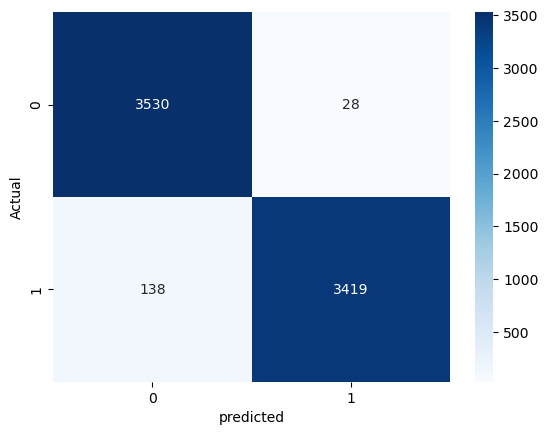

confussion matrix
[[3530   28]
 [ 138 3419]]


Accuracy of Gradient Boosting: 97.6669009135629 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3558
           1       0.99      0.96      0.98      3557

    accuracy                           0.98      7115
   macro avg       0.98      0.98      0.98      7115
weighted avg       0.98      0.98      0.98      7115



In [50]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.savefig('confussion matrix', dpi=350, bbox_inches='tight')
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred))

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve', dpi=350, bbox_inches='tight')
plt.show()

NameError: name 'model' is not defined

In [ ]:
# Function to plot hyperopt results
def plot_hyperopt_results(trials, n_trials, position):
    plt.subplot(3, 1, position)
    plt.title(f'Hyperopt - {n_trials} trials')
    plt.xlabel('n_estimators')
    plt.ylabel('learning_rate')

    hyperopt_params = np.array([
        (trial['misc']['vals']['n_estimators'][0], trial['misc']['vals']['learning_rate'][0])
        for trial in trials.trials
    ])
    hyperopt_losses = [trial['result']['loss'] for trial in trials.trials]

    plt.scatter(hyperopt_params[:, 0], hyperopt_params[:, 1], c=hyperopt_losses, cmap='viridis')
    plt.colorbar(label='Loss')

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 18))

# Hyperopt (TPE) - 10 trials
trials_10, best_10 = hyperopt_trials(10)
plot_hyperopt_results(trials_10, 10, 1)

# Hyperopt (TPE) - 30 trials
trials_30, best_30 = hyperopt_trials(30)
plot_hyperopt_results(trials_30, 30, 2)

# Hyperopt (TPE) - 100 trials
trials_100, best_100 = hyperopt_trials(100)
plot_hyperopt_results(trials_100, 100, 3)

plt.tight_layout()
plt.show()

## Visualisasi n_estimators

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame(
    {'Model': ['Random Forest', 'Extreme Gradient Boosting'], 'Accuracy': [gb_acc_score*100, gb_acc_score*100]}
)
model_ev

In [ ]:
colors = ['salmon','Wheat']

plt.figure(figsize=(7,7), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()